In [26]:
import numpy as np
from PIL import ImageDraw
from keras.preprocessing import image
from matplotlib import pyplot as plt
import xml.dom.minidom
import xml.etree.ElementTree as ET
import os

def drawImage(path, fruit, id):
    tmp1 = path + fruit + '_' + id + '.jpg'
    tmp2 = path + fruit + '_' + id + '.xml'
    #path = 'C:\\Users\\abhishs7\\Downloads\\train_zip\\train\\apple_1.jpg'
    img = image.load_img(tmp1, target_size=(300,300)) 
    draw = ImageDraw.Draw(img)
    
    print(img)
    dim = [8, 15, 339, 341]
    new_dim = []
    for d in dim:
        x = (300/250) * d
        x = int(x)
        x = min(x, 300)
        x = max(x, 0)
        new_dim.append(x)
    print(new_dim)
    draw.rectangle(new_dim, outline='Black')
    plt.imshow(img)

path = './train/apple_1.xml'
doc = ET.parse(path)
root = doc.getroot()
W, H, xmin, ymin, xmax, ymax = 0, 0, 0, 0, 0, 0
for elem in root:
    for s in elem:
        if s.tag == 'width': W = int(s.text)
        if s.tag == 'height': H = int(s.text)
        for k in s:
            if k.tag == 'xmin' : xmin = int(k.text)
            if k.tag == 'ymin' : ymin = int(k.text)
            if k.tag == 'xmax' : xmax = int(k.text)
            if k.tag == 'ymax' : ymax = int(k.text)
#print(doc.childNodes)
print(W, H, xmin, ymin, xmax, ymax)

250 250 8 15 230 230


In [111]:

def get_img(PATH, fruit, idx):
    path_img = PATH + fruit + '_' + str(idx) + '.jpg'
    if not os.path.isfile(path_img):
        return np.array([])
    img = image.load_img(path_img, target_size=(150,150))
    arr = image.img_to_array(img)
    return np.array(arr)

def get_meta(PATH ,fruit, idx, sz = (150, 150)):
    path_meta = PATH + fruit + '_' + str(idx) + '.xml'
    if not os.path.isfile(path_meta):
        return np.array([])
    doc = ET.parse(path_meta)
    root = doc.getroot()
    W, H, xmin, ymin, xmax, ymax = 300, 300, 0, 0, 0, 0
    for elem in root:
        for s in elem:
            if s.tag == 'width': W = int(s.text)
            if s.tag == 'height': H = int(s.text)
            for k in s:
                if k.tag == 'xmin' : xmin = int(k.text)
                if k.tag == 'ymin' : ymin = int(k.text)
                if k.tag == 'xmax' : xmax = int(k.text)
                if k.tag == 'ymax' : ymax = int(k.text)
#     print(W, H)
    print(path_meta)
    if W == 0 or H == 0 :
        x_min, y_min, x_max, y_max = 10, 10, 250, 250
        z = np.array([x_min, y_min, x_max, y_max])
        print(z)
        z = z / 250.0
        print('nooo..',z)
        return z
    
    return np.array([xmin/W, ymin/H, xmax/W, ymax/H])
#     x_min = (sz[0] / W) * xmin
#     y_min = (sz[1] / H) * ymin
#     x_max = (sz[0] / W) * xmax
#     y_max = (sz[1] / H) * ymax
#     z = np.array([x_min, y_min, x_max, y_max]) 
#     print(z)
#     z = z / 150.0
#     print(z)
#     return z
    


def train_data(PATH):
    labels = []
    # 1 0 0 apple
    # 0 1 0 banana
    # 0 0 1 orange
    x_train = []
    y_train = []
    
    for i in range(76):
        print(i)
        #apples
        img = get_img(PATH, 'apple', i+1)
        meta = get_meta(PATH, 'apple', i+1)
        
        if img.any() : x_train.append(img)
        if meta.any() :
            y_train.append(meta)
            labels.append([1,0,0])
        
        # bananas
        img = get_img(PATH, 'banana', i+1)
        meta = get_meta(PATH, 'banana', i+1)
        if img.any(): x_train.append(img)
        if meta.any() :
            y_train.append(meta)
            labels.append([0,1,0])
        
        #oranges
        img = get_img(PATH, 'orange', i+1)
        meta = get_meta(PATH, 'orange', i+1)
        if img.any() : x_train.append(img)
        if meta.any() :
            y_train.append(meta)
            labels.append([0, 0, 1])
    
    labels = np.array(labels)
    x_train = np.array(x_train).astype('float')
    y_train = np.array(y_train).astype('float')
    return (x_train, y_train, labels)

x_train, y_train_dim, y_train_label = train_data('./train/')
x_valid, y_valid_dim, y_valid_label = x_train[ -5 : , : , : , :], y_train_dim[-5 : , :], y_train_label[-5 : , :]
x_train, y_train_dim, y_train_label = x_train[ : -5, :, :, :], y_train_dim[ : -5, :], y_train_label[:-5, :]
print(x_train.shape, y_train_dim.shape, y_train_label.shape)
print(x_valid.shape, y_valid_dim.shape, y_valid_label.shape)

0
./train/apple_1.xml
./train/banana_1.xml
./train/orange_1.xml
1
./train/apple_2.xml
./train/banana_2.xml
./train/orange_2.xml
2
./train/apple_3.xml
./train/banana_3.xml
./train/orange_3.xml
3
./train/apple_4.xml
./train/banana_4.xml
./train/orange_4.xml
[ 10  10 250 250]
nooo.. [0.04 0.04 1.   1.  ]
4
./train/apple_5.xml
./train/banana_5.xml
./train/orange_5.xml
5
./train/apple_6.xml
./train/banana_6.xml
./train/orange_6.xml
6
./train/apple_7.xml
./train/banana_7.xml
./train/orange_7.xml
7
./train/apple_8.xml
[ 10  10 250 250]
nooo.. [0.04 0.04 1.   1.  ]


/home/anni11/Desktop/mlblr/py3/lib/python3.6/site-packages/PIL/Image.py:918: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


./train/banana_8.xml
./train/orange_8.xml
8
./train/apple_9.xml
./train/banana_9.xml
./train/orange_9.xml
9
./train/apple_10.xml
./train/banana_10.xml
./train/orange_10.xml
10
./train/apple_11.xml
./train/banana_11.xml
./train/orange_11.xml
[ 10  10 250 250]
nooo.. [0.04 0.04 1.   1.  ]
11
./train/apple_12.xml
./train/banana_12.xml
./train/orange_12.xml
12
./train/apple_13.xml
./train/banana_13.xml
./train/orange_13.xml
[ 10  10 250 250]
nooo.. [0.04 0.04 1.   1.  ]
13
./train/apple_14.xml
./train/banana_14.xml
./train/orange_14.xml
14
./train/apple_15.xml
./train/banana_15.xml
./train/orange_15.xml
15
./train/apple_16.xml
./train/banana_16.xml
./train/orange_16.xml
16
./train/apple_17.xml
[ 10  10 250 250]
nooo.. [0.04 0.04 1.   1.  ]
./train/banana_17.xml
./train/orange_17.xml
17
./train/apple_18.xml
./train/banana_18.xml
./train/orange_18.xml
[ 10  10 250 250]
nooo.. [0.04 0.04 1.   1.  ]
18
./train/apple_19.xml
./train/orange_19.xml
19
./train/apple_20.xml
[ 10  10 250 250]
nooo.. 

In [112]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, BatchNormalization
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate


inp_img = Input(shape=(150,150,3), name='input_img')
c1 = Conv2D(32, kernel_size=3, activation='relu')(inp_img)
c1 = BatchNormalization()(c1)
p1 = MaxPooling2D(pool_size=(2,2))(c1) #74
c2 = Conv2D(64, kernel_size=3, activation='relu')(p1)
c2 = BatchNormalization()(c2)
p2 = MaxPooling2D(pool_size=(2,2))(c2) #36
c3 = Conv2D(128, kernel_size=3, activation='relu')(p2)
c3 = BatchNormalization()(c3)
p3 = MaxPooling2D(pool_size=(2,2))(c3) #17

f1 = Flatten()(p3)
d = Dense(13, activation='relu')(f1)
d = BatchNormalization()(d)
d = Dense(13, activation='relu')(d)
d = BatchNormalization()(d)
d1 = Dense(10, activation = 'sigmoid')(d)
out1 = Dense(3, activation='softmax', name='cls_out')(d)
out2 = Dense(4, activation='sigmoid', name='box_dim')(d1)
model = Model(inputs=inp_img, outputs=[out1,out2])
model.compile(loss={'cls_out':'categorical_crossentropy', 'box_dim':'mean_squared_error'}, 
              optimizer='adam', metrics=['accuracy'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_img (InputLayer)          (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_49 (Conv2D)              (None, 148, 148, 32) 896         input_img[0][0]                  
__________________________________________________________________________________________________
batch_normalization_48 (BatchNo (None, 148, 148, 32) 128         conv2d_49[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_49 (MaxPooling2D) (None, 74, 74, 32)   0           batch_normalization_48[0][0]     
__________________________________________________________________________________________________
conv2d_50 

In [113]:
model.fit(x_train, {'cls_out' : y_train_label, 'box_dim' : y_train_dim}, 
          epochs=15, batch_size=5, verbose=1, validation_data = (x_valid, {
              'cls_out' : y_valid_label,
              'box_dim' : y_valid_dim
          }))

Train on 217 samples, validate on 5 samples
Epoch 1/15
217/217 [==============================] - 39s 178ms/step - loss: 1.0872 - cls_out_loss: 1.0257 - box_dim_loss: 0.0615 - cls_out_acc: 0.5207 - box_dim_acc: 0.4885 - val_loss: 2.2338 - val_cls_out_loss: 2.1700 - val_box_dim_loss: 0.0638 - val_cls_out_acc: 0.6000 - val_box_dim_acc: 0.6000
Epoch 2/15
217/217 [==============================] - 35s 159ms/step - loss: 0.8826 - cls_out_loss: 0.8359 - box_dim_loss: 0.0468 - cls_out_acc: 0.6544 - box_dim_acc: 0.4470 - val_loss: 3.6724 - val_cls_out_loss: 3.6215 - val_box_dim_loss: 0.0509 - val_cls_out_acc: 0.6000 - val_box_dim_acc: 0.6000
Epoch 3/15
217/217 [==============================] - 35s 160ms/step - loss: 0.7195 - cls_out_loss: 0.6816 - box_dim_loss: 0.0379 - cls_out_acc: 0.7189 - box_dim_acc: 0.4700 - val_loss: 2.1345 - val_cls_out_loss: 2.0917 - val_box_dim_loss: 0.0427 - val_cls_out_acc: 0.4000 - val_box_dim_acc: 0.8000
Epoch 4/15
217/217 [==============================] - 35s 1

In [114]:

def test_data(PATH):
    labels = []
    # 1 0 0 apple
    # 0 1 0 banana
    # 0 0 1 orange
    x_train = []
    y_train = []
    
    for i in range(77, 96):
#         print(i?)
        #apples
        img = get_img(PATH, 'apple', i+1)
        meta = get_meta(PATH, 'apple', i+1)
        
        if img.any() : x_train.append(img)
        if meta.any() :
            y_train.append(meta)
            labels.append([1,0,0])
        
        # bananas
        img = get_img(PATH, 'banana', i+1)
        meta = get_meta(PATH, 'banana', i+1)
        if img.any(): x_train.append(img)
        if meta.any() :
            y_train.append(meta)
            labels.append([0,1,0])
        
        #oranges
        img = get_img(PATH, 'orange', i+1)
        meta = get_meta(PATH, 'orange', i+1)
        if img.any() : x_train.append(img)
        if meta.any() :
            y_train.append(meta)
            labels.append([0, 0, 1])
    
    labels = np.array(labels)
    x_train = np.array(x_train).astype('float')
    y_train = np.array(y_train).astype('float')
    return (x_train, y_train, labels)

x_test, y_test_dim, y_test_label = test_data('./test/')
print(x_test.shape, y_test_dim.shape, y_test_label.shape)

./test/apple_78.xml
./test/banana_78.xml
./test/orange_78.xml
./test/apple_79.xml
[ 10  10 250 250]
nooo.. [0.04 0.04 1.   1.  ]
./test/banana_79.xml
./test/orange_79.xml
./test/apple_80.xml
./test/banana_80.xml
./test/orange_80.xml
./test/apple_81.xml
./test/banana_81.xml
./test/orange_81.xml
./test/apple_82.xml
./test/banana_82.xml
./test/orange_82.xml
./test/apple_83.xml
./test/banana_83.xml
./test/orange_83.xml
./test/apple_84.xml
./test/banana_84.xml
./test/orange_84.xml
./test/apple_85.xml
./test/banana_85.xml
./test/orange_85.xml
./test/apple_86.xml
./test/banana_86.xml
./test/orange_86.xml
./test/apple_87.xml
./test/banana_87.xml
[ 10  10 250 250]
nooo.. [0.04 0.04 1.   1.  ]
./test/orange_87.xml
./test/apple_88.xml
./test/banana_88.xml
./test/apple_89.xml
./test/banana_89.xml
./test/orange_89.xml
./test/apple_90.xml
./test/banana_90.xml
./test/orange_90.xml
./test/apple_91.xml
./test/banana_91.xml
./test/orange_91.xml
./test/apple_92.xml
[ 10  10 250 250]
nooo.. [0.04 0.04 1. 

In [115]:
l = model.predict(np.array(x_test))

print(l)

[array([[8.48288536e-01, 1.20432377e-01, 3.12791802e-02],
       [1.59791574e-01, 7.54100382e-01, 8.61081332e-02],
       [2.10650042e-02, 2.86057502e-01, 6.92877471e-01],
       [7.52738237e-01, 2.45279714e-01, 1.98205048e-03],
       [4.75008553e-03, 9.90082681e-01, 5.16717322e-03],
       [3.00685484e-02, 4.86643165e-02, 9.21267152e-01],
       [8.82271290e-01, 8.99780393e-02, 2.77507249e-02],
       [1.39768183e-01, 6.87926352e-01, 1.72305539e-01],
       [2.15516333e-02, 2.06347823e-01, 7.72100508e-01],
       [9.32624042e-01, 5.26996143e-02, 1.46763558e-02],
       [7.20651122e-03, 9.85050917e-01, 7.74251809e-03],
       [2.39808820e-02, 1.17045924e-01, 8.58973145e-01],
       [8.78652632e-01, 4.99268472e-02, 7.14205354e-02],
       [8.57241973e-02, 6.31188571e-01, 2.83087194e-01],
       [1.57503076e-02, 1.60313323e-01, 8.23936343e-01],
       [8.05580735e-01, 1.90974861e-01, 3.44436313e-03],
       [4.86427499e-03, 9.82060671e-01, 1.30750984e-02],
       [2.81758495e-02, 5.1427

<PIL.Image.Image image mode=RGB size=150x150 at 0x7F6BAF591FD0>
[37, 31, 119, 117]


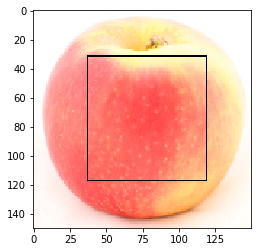

In [123]:
def drawImageWithBox(img_arr, bbox):
    #path = 'C:\\Users\\abhishs7\\Downloads\\train_zip\\train\\apple_1.jpg'
    img = image.array_to_img(img_arr)
    draw = ImageDraw.Draw(img)
    
    print(img)
    dim = bbox
    new_dim = [int(x * 150) for x in dim]
    print(new_dim)
    draw.rectangle(new_dim, outline='Black')
    plt.imshow(img)
drawImageWithBox(x_test[0], l[1][0])


<PIL.Image.Image image mode=RGB size=150x150 at 0x7F6BA6F32AC8>
[21, 25, 126, 130]


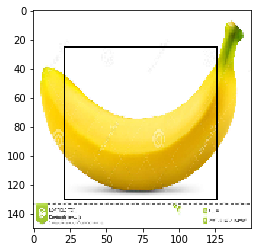

In [182]:
drawImageWithBox(x_test[4], l[1][4])

<PIL.Image.Image image mode=RGB size=150x150 at 0x7F6BA8061BA8>
[35, 28, 122, 122]


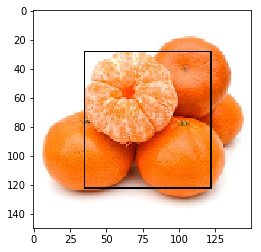

In [131]:
drawImageWithBox(x_test[5], l[1][5])

<PIL.Image.Image image mode=RGB size=150x150 at 0x7F6BA7FD6978>
[35, 28, 119, 122]


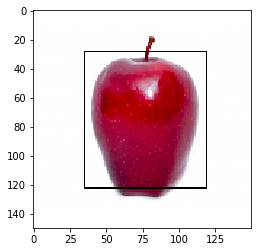

In [134]:
i=6
drawImageWithBox(x_test[i], l[1][i])
i+=1

<PIL.Image.Image image mode=RGB size=150x150 at 0x7F6BA7F70DA0>
[32, 23, 120, 125]


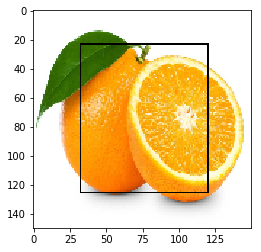

In [136]:
drawImageWithBox(x_test[i], l[1][i])
i+=1

<PIL.Image.Image image mode=RGB size=150x150 at 0x7F6BA7DF4278>
[20, 22, 126, 130]


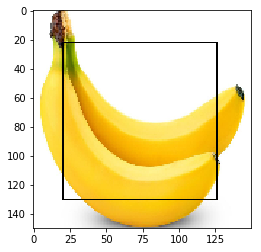

In [138]:
drawImageWithBox(x_test[i], l[1][i])
i+=1

<PIL.Image.Image image mode=RGB size=150x150 at 0x7F6BA7F0BF98>
[31, 24, 122, 126]


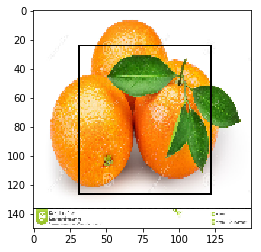

In [139]:
drawImageWithBox(x_test[i], l[1][i])
i+=1

<PIL.Image.Image image mode=RGB size=150x150 at 0x7F6BA7E09B38>
[37, 26, 121, 125]


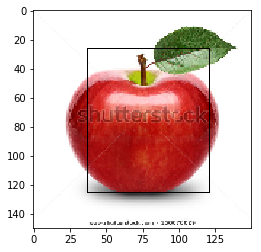

In [140]:

drawImageWithBox(x_test[i], l[1][i])
i+=1

<PIL.Image.Image image mode=RGB size=150x150 at 0x7F6BA8069F98>
[27, 22, 121, 128]


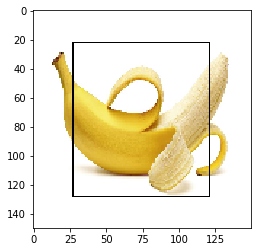

In [141]:

drawImageWithBox(x_test[i], l[1][i])
i+=1

<PIL.Image.Image image mode=RGB size=150x150 at 0x7F6BA7D13470>
[33, 24, 120, 124]


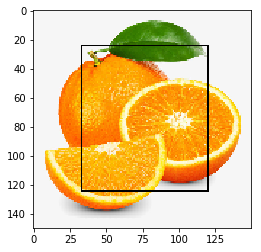

In [142]:

drawImageWithBox(x_test[i], l[1][i])
i+=1

<PIL.Image.Image image mode=RGB size=150x150 at 0x7F6BA7AD63C8>
[28, 23, 122, 126]


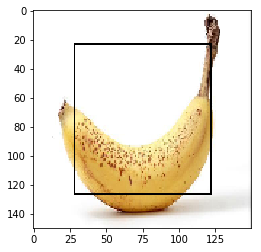

In [147]:

drawImageWithBox(x_test[i], l[1][i])
i+=1

<PIL.Image.Image image mode=RGB size=150x150 at 0x7F6BA7AAADA0>
[27, 21, 121, 125]


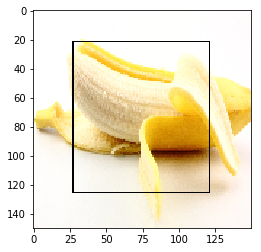

In [150]:

drawImageWithBox(x_test[i], l[1][i])
i+=1

<PIL.Image.Image image mode=RGB size=150x150 at 0x7F6BA7863DD8>
[29, 21, 120, 125]


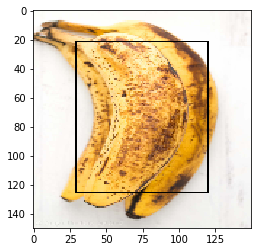

In [153]:
drawImageWithBox(x_test[i], l[1][i])
i+=1

<PIL.Image.Image image mode=RGB size=150x150 at 0x7F6BA7832080>
[32, 25, 121, 125]


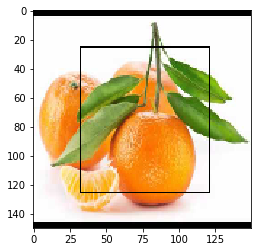

In [154]:

drawImageWithBox(x_test[i], l[1][i])
i+=1

<PIL.Image.Image image mode=RGB size=150x150 at 0x7F6BA778F1D0>
[36, 25, 121, 126]


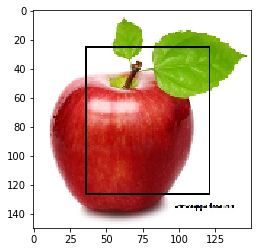

In [155]:

drawImageWithBox(x_test[i], l[1][i])
i+=1

<PIL.Image.Image image mode=RGB size=150x150 at 0x7F6BA76C6D68>
[33, 26, 122, 125]


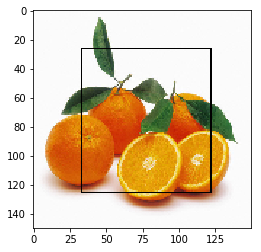

In [157]:

drawImageWithBox(x_test[i], l[1][i])
i+=1

<PIL.Image.Image image mode=RGB size=150x150 at 0x7F6BA76A27B8>
[32, 24, 125, 127]


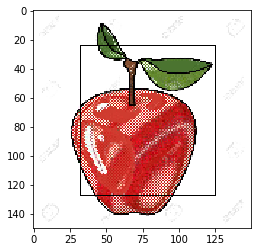

In [158]:

drawImageWithBox(x_test[i], l[1][i])
i+=1

<PIL.Image.Image image mode=RGB size=150x150 at 0x7F6BA7ADD128>
[37, 33, 122, 117]


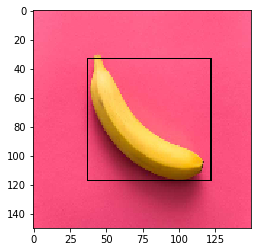

In [159]:
drawImageWithBox(x_test[i], l[1][i])
i+=1

<PIL.Image.Image image mode=RGB size=150x150 at 0x7F6BA75E6EB8>
[27, 23, 123, 127]


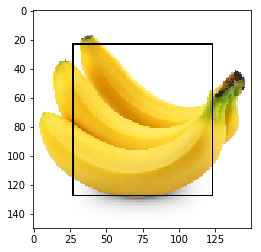

In [161]:
drawImageWithBox(x_test[i], l[1][i])
i+=1

<PIL.Image.Image image mode=RGB size=150x150 at 0x7F6BA74F4FD0>
[31, 24, 120, 126]


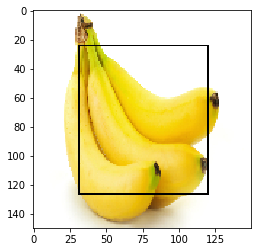

In [164]:
drawImageWithBox(x_test[i], l[1][i])
i+=1

<PIL.Image.Image image mode=RGB size=150x150 at 0x7F6BA7393908>
[37, 29, 124, 121]


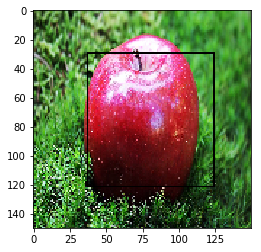

In [166]:
drawImageWithBox(x_test[i], l[1][i])
i+=1

<PIL.Image.Image image mode=RGB size=150x150 at 0x7F6BA751EC88>
[32, 22, 119, 124]


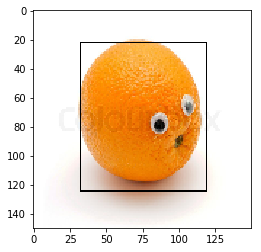

In [168]:
drawImageWithBox(x_test[i], l[1][i])
i+=1

<PIL.Image.Image image mode=RGB size=150x150 at 0x7F6BA729F908>
[33, 22, 124, 128]


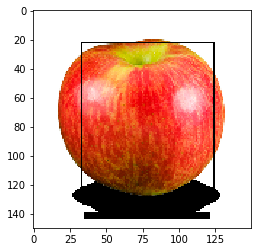

In [169]:
drawImageWithBox(x_test[i], l[1][i])
i+=1

<PIL.Image.Image image mode=RGB size=150x150 at 0x7F6BA72A7F28>
[30, 25, 119, 126]


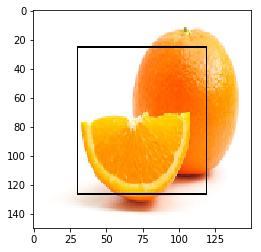

In [171]:
drawImageWithBox(x_test[i], l[1][i])
i+=1

<PIL.Image.Image image mode=RGB size=150x150 at 0x7F6BA72C3208>
[40, 29, 120, 122]


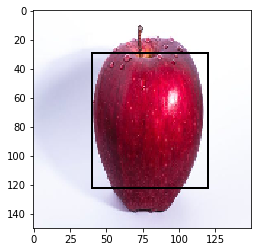

In [172]:
drawImageWithBox(x_test[i], l[1][i])
i+=1

<PIL.Image.Image image mode=RGB size=150x150 at 0x7F6BA7124D30>
[25, 21, 124, 127]


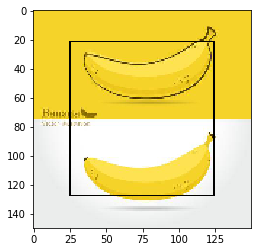

In [173]:
drawImageWithBox(x_test[i], l[1][i])
i+=1

<PIL.Image.Image image mode=RGB size=150x150 at 0x7F6BA70EB4E0>
[29, 21, 121, 126]


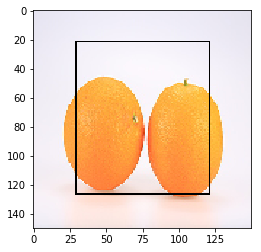

In [174]:
drawImageWithBox(x_test[i], l[1][i])
i+=1

<PIL.Image.Image image mode=RGB size=150x150 at 0x7F6BA71D3978>
[26, 19, 121, 127]


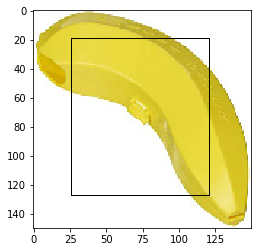

In [176]:
drawImageWithBox(x_test[i], l[1][i])
i+=1

<PIL.Image.Image image mode=RGB size=150x150 at 0x7F6BA702AD30>
[34, 25, 119, 124]


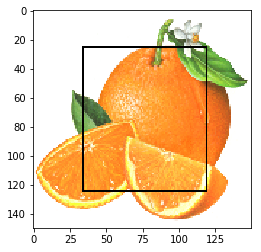

In [177]:
drawImageWithBox(x_test[i], l[1][i])
i+=1

<PIL.Image.Image image mode=RGB size=150x150 at 0x7F6BA6F5B7B8>
[39, 31, 120, 118]


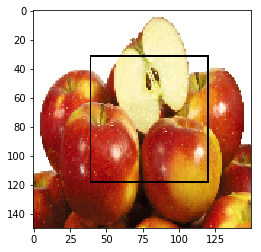

In [178]:
drawImageWithBox(x_test[i], l[1][i])
i+=1

<PIL.Image.Image image mode=RGB size=150x150 at 0x7F6BA6FFE208>
[32, 24, 120, 125]


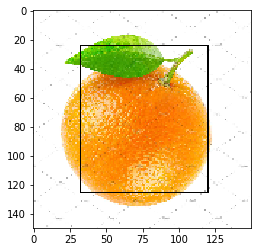

In [179]:
drawImageWithBox(x_test[i], l[1][i])
i+=1